<a href="https://colab.research.google.com/github/le-beda/Coursework2023/blob/main/data_smoothing_for_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сглаживание результатов 3d симуляций

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/simulation_tables

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/simulation_tables'
/content


## Чтение данных

In [58]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  print("read file ", file_path)
  return pd.read_csv(file_path)

In [59]:
def read_description(directory_path, file_name = "description.txt"):
  file_path = os.path.join(directory_path, file_name)
  print("read description from file  ", file_path)
  with open(file_path, 'r') as file:
    return file.read()


In [60]:
def read_files(directory_path):
  data = {}
  # описание параметров
  data["description_str"] = read_description(directory_path)
  # численность популяции
  data["population"] = read_csv_file(directory_path, "population")
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  data["population"].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  # результаты последовательных сглаживаний численности популяции
  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    data[name] = read_csv_file(directory_path, name)
    data[name].rename(columns={"Unnamed: 0": 'epochs'}, inplace=True)
  return data

## Построение графиков

In [61]:
def print_smoothing(data, x="time"):
  fig = plt.figure(figsize=(20, 30), dpi=80)
  plt.axis('off')
  plt.title("Sequential exponential smoothing results (a=0.1)")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(nrows=12//columns_count, ncols=columns_count)

  axes[0, 0].plot(data["population"][x], data["population"]['pop'], "r", label="population")
  axes[0, 0].legend()
  axes[0, 0].set_xlabel(x)
  axes[0, 0].set_ylabel('pop')

  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    i, j = count//columns_count , count %columns_count
    axes[i, j].plot(data[name][x], data[name]["exp_pop" if count==1 else "exp_pop2"],"g" if count==10 else "b", label=name)
    axes[i, j].legend(loc="lower right")
    axes[i, j].set_xlabel(x)
    axes[i, j].set_ylabel('pop')
  fig.delaxes(axes[5, 1])


In [62]:
def print_smoothing_in_one_window(print_data1, print_data2, x, x_name="epochs", start_end = None, title = None, legend1 = "population", legend2 = "smoothing"):
  fig = plt.figure(figsize=(10, 10), dpi=80)
  plt.axis('off')
  plt.title(title or "Smoothing")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(1)

  axes.plot(x, print_data1, "b", label=legend1)
  axes.plot(x, print_data2, "r", label=legend2)
  axes.legend(loc="lower right")
  axes.set_xlabel(x_name)
  axes.set_ylabel('pop')


## Примеры применения алгоритма скользящего среднего

In [63]:
def moving_average(series, k):
  print("return",np.average(series[-k:]) )
  return np.average(series[-k:])

In [64]:
data = read_files("/content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1")

read description from file   /content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/description.txt
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/population.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/exp_pop.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/exp_pop2.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim_big_cmpetition/smoothing_long_sim_big_cmpetitiondd_25_death_r3_auto_stop_at_pl

In [65]:
time = data["population"]["epochs"]
population = data["population"]["pop"]

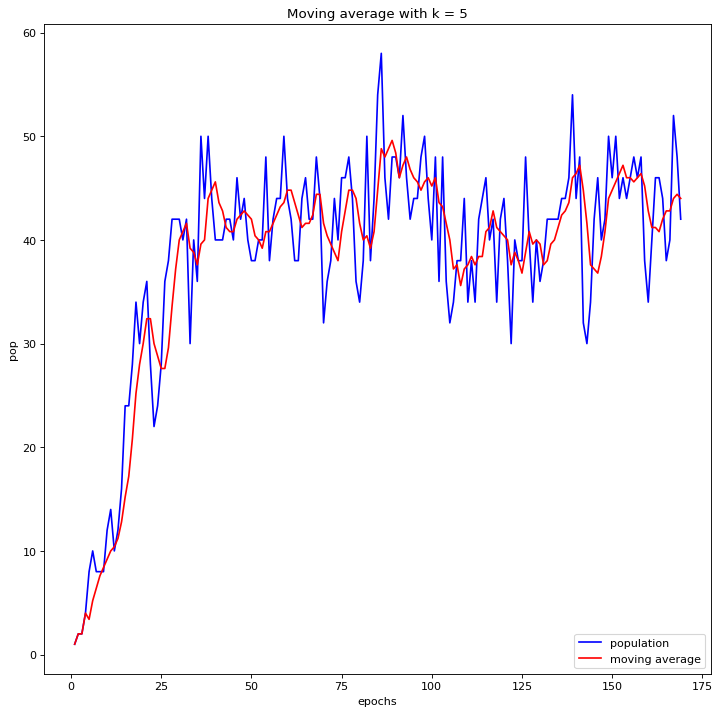

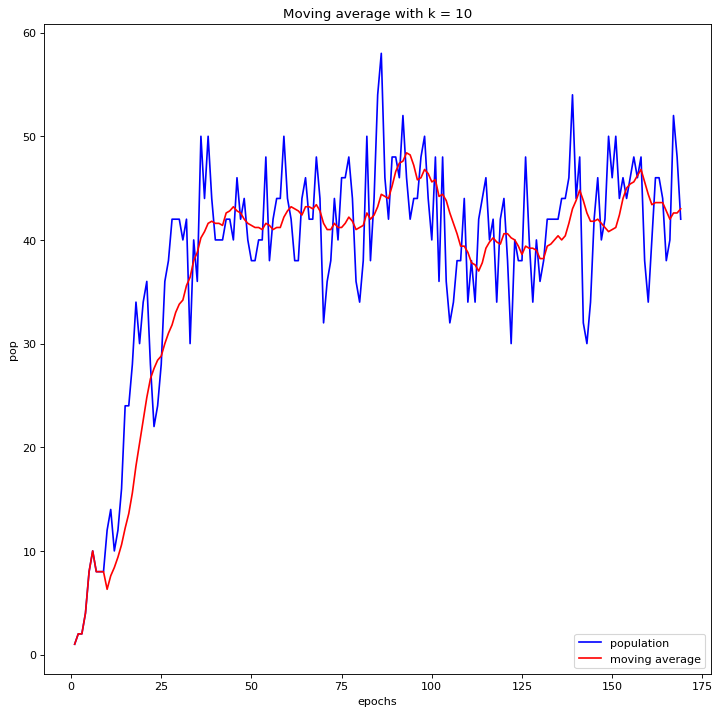

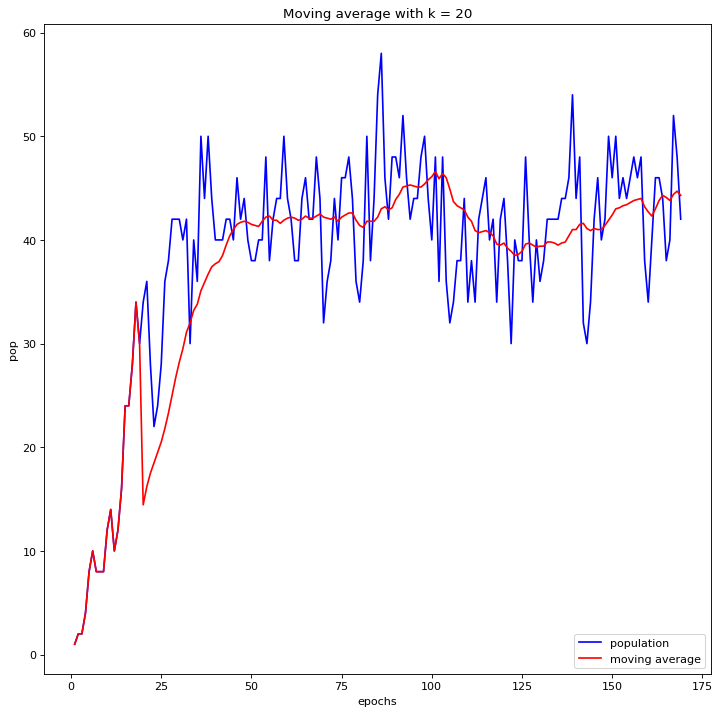

In [69]:
# применение скользящего среднего для разных значений окон
for k in [5, 10, 20]:
  smoothing_data = population[:k - 1 ]
  for i in range(k - 1 , len(population)):
    y_i =  np.average(population[i-(k-1): i+1])
    smoothing_data = pd.concat([smoothing_data, pd.Series(y_i)], ignore_index=True)
  print_smoothing_in_one_window(print_data1=population, print_data2=smoothing_data, x=time, legend2 = "moving average", title="Moving average with k = {}".format(k))
  

## Примеры применения простого экспоненциального сглаживания

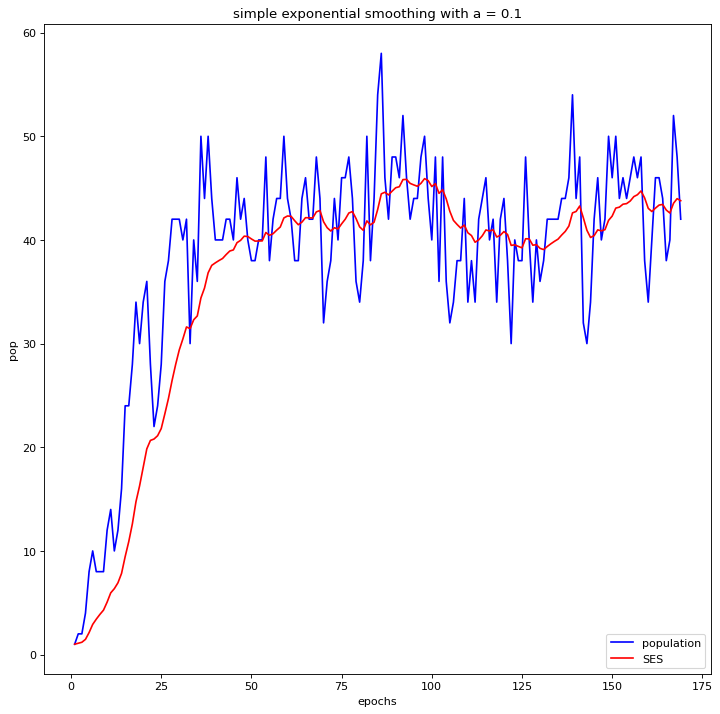

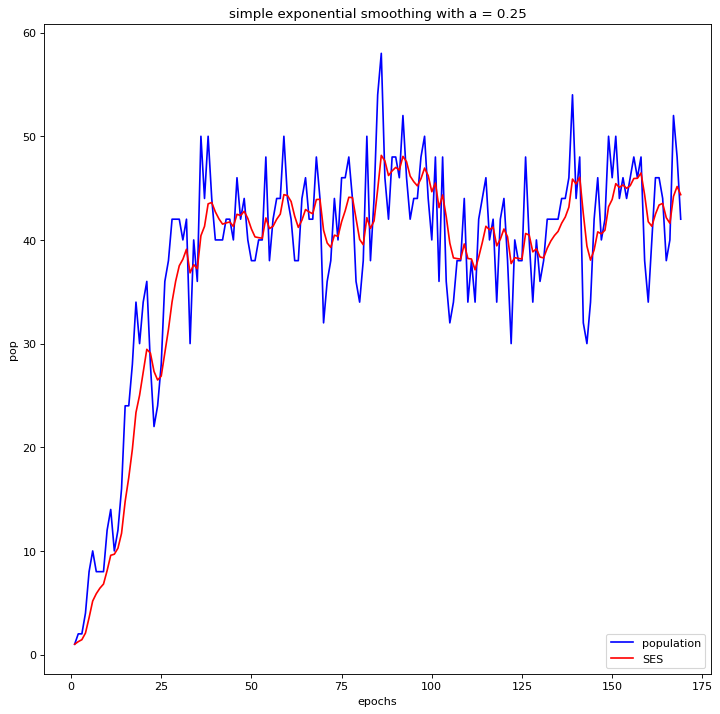

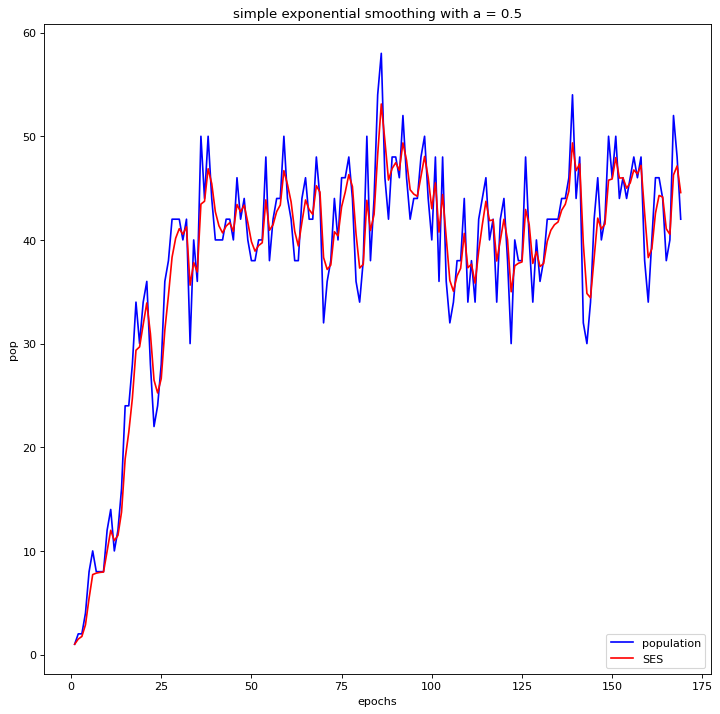

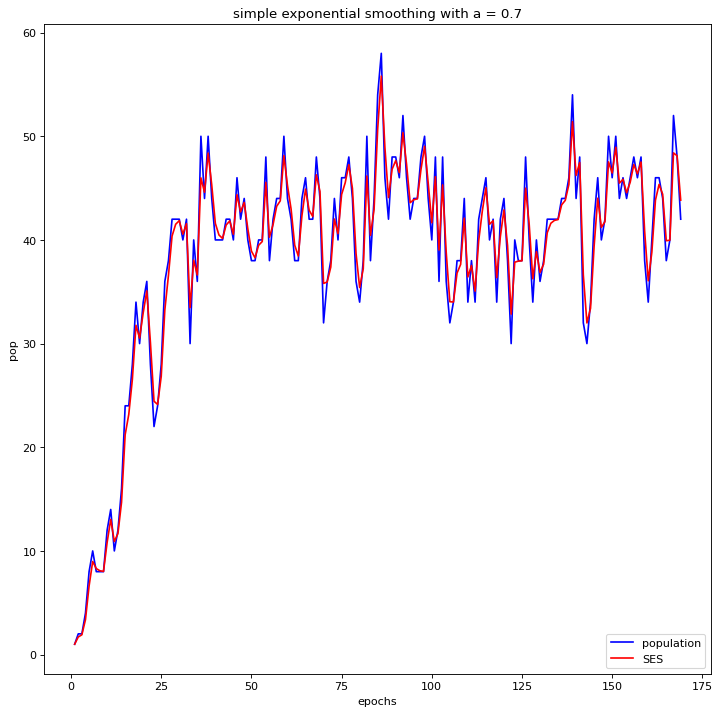

In [67]:
for a in [0.1, 0.25, 0.5, 0.7]:
  smoothing_data = population[:1 ]
  for i in range(1 , len(population)):
    y_i =  a*population[i] + smoothing_data[i-1]*(1-a)
    smoothing_data = pd.concat([smoothing_data, pd.Series(y_i)], ignore_index=True)
  print_smoothing_in_one_window(print_data1=population, print_data2=smoothing_data, x=time, legend2 = "SES", title="simple exponential smoothing with a = {}".format(a))

## Примеры применения последовательного экспоненциального сглаживания с a=0.1


dd=25
death_r=3
epochs_count=2.5e+07
plateau_threshold=10
area_length_x=10
initial_pop=1
auto_stop_at_plateau=FALSE
b=1
sd_b=1
sd_d=1
found_plateau=FALSE
realtime_limit_reached=TRUE



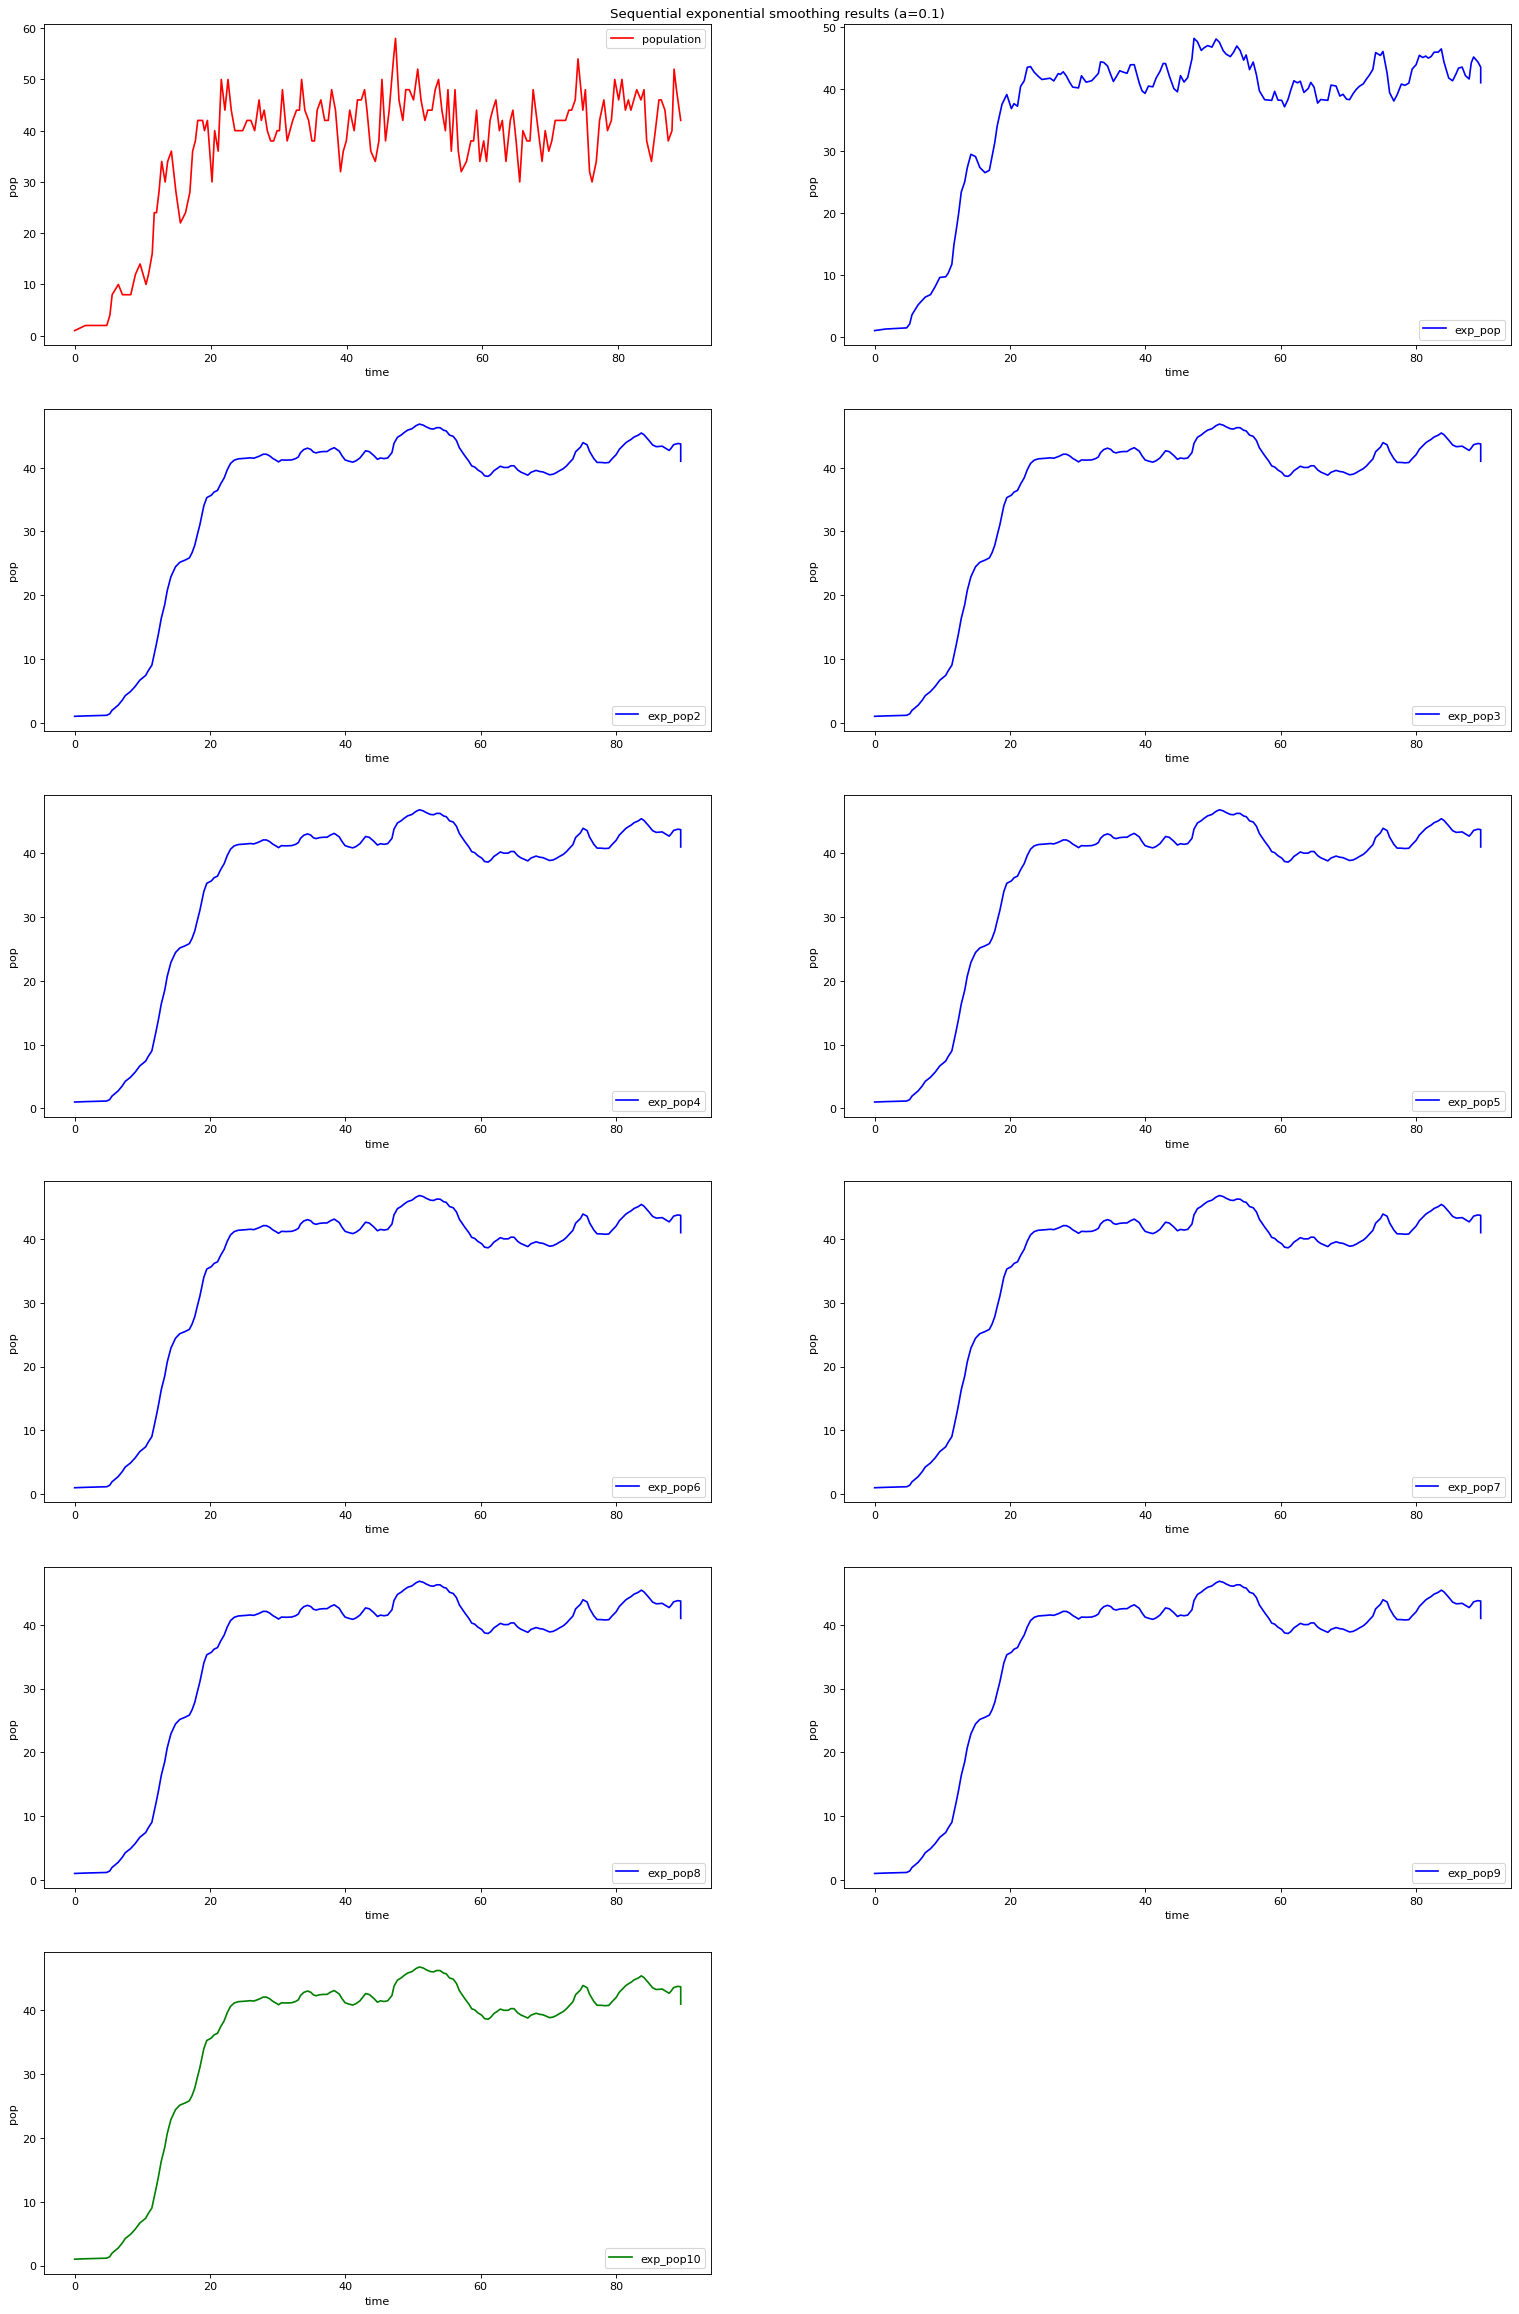

In [68]:
print_smoothing(data)
print(data["description_str"])

In [72]:
data2 = read_files("/content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1")

print(data2["description_str"])

read description from file   /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/description.txt
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/population.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/exp_pop.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/exp_pop2.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_death_r3_auto_stop_at_plateau__b_1FALSE_initial_pop_1_sd_b_1_sd_d_1/exp_pop3.csv
read file  /content/drive/MyDrive/simulations_tables/smoothing_long_sim/smoothing_long_simdd_5_dea

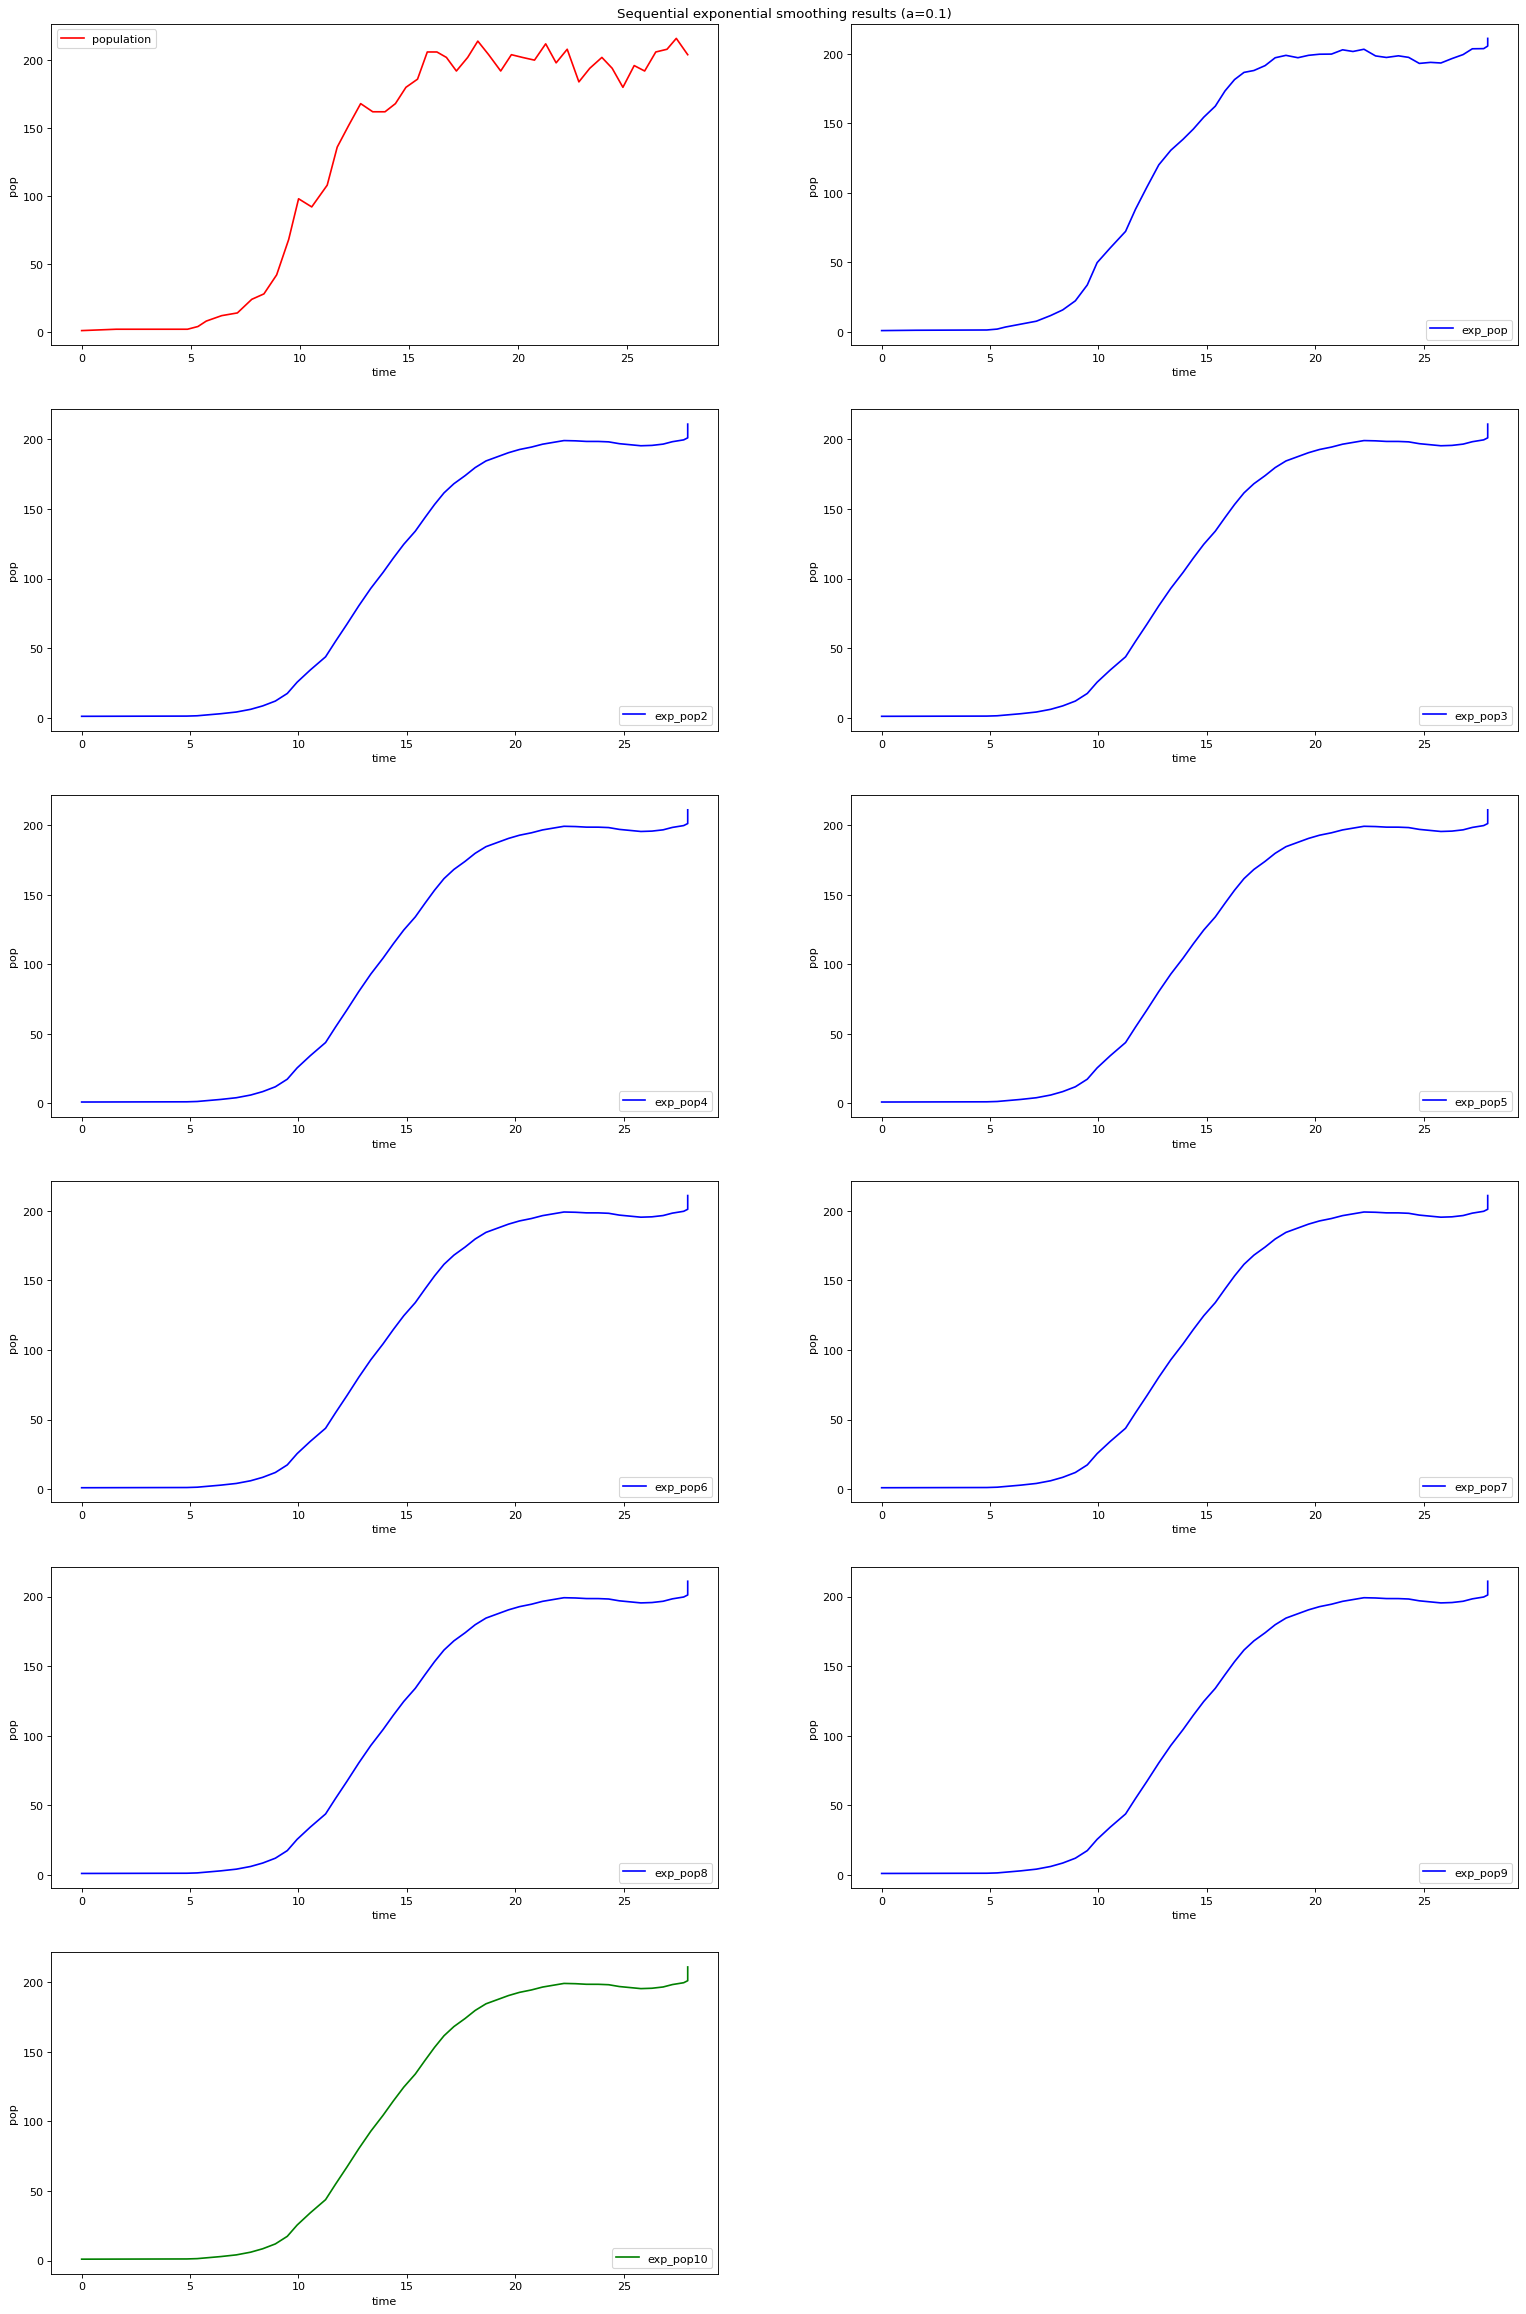

In [73]:
print_smoothing(data2)

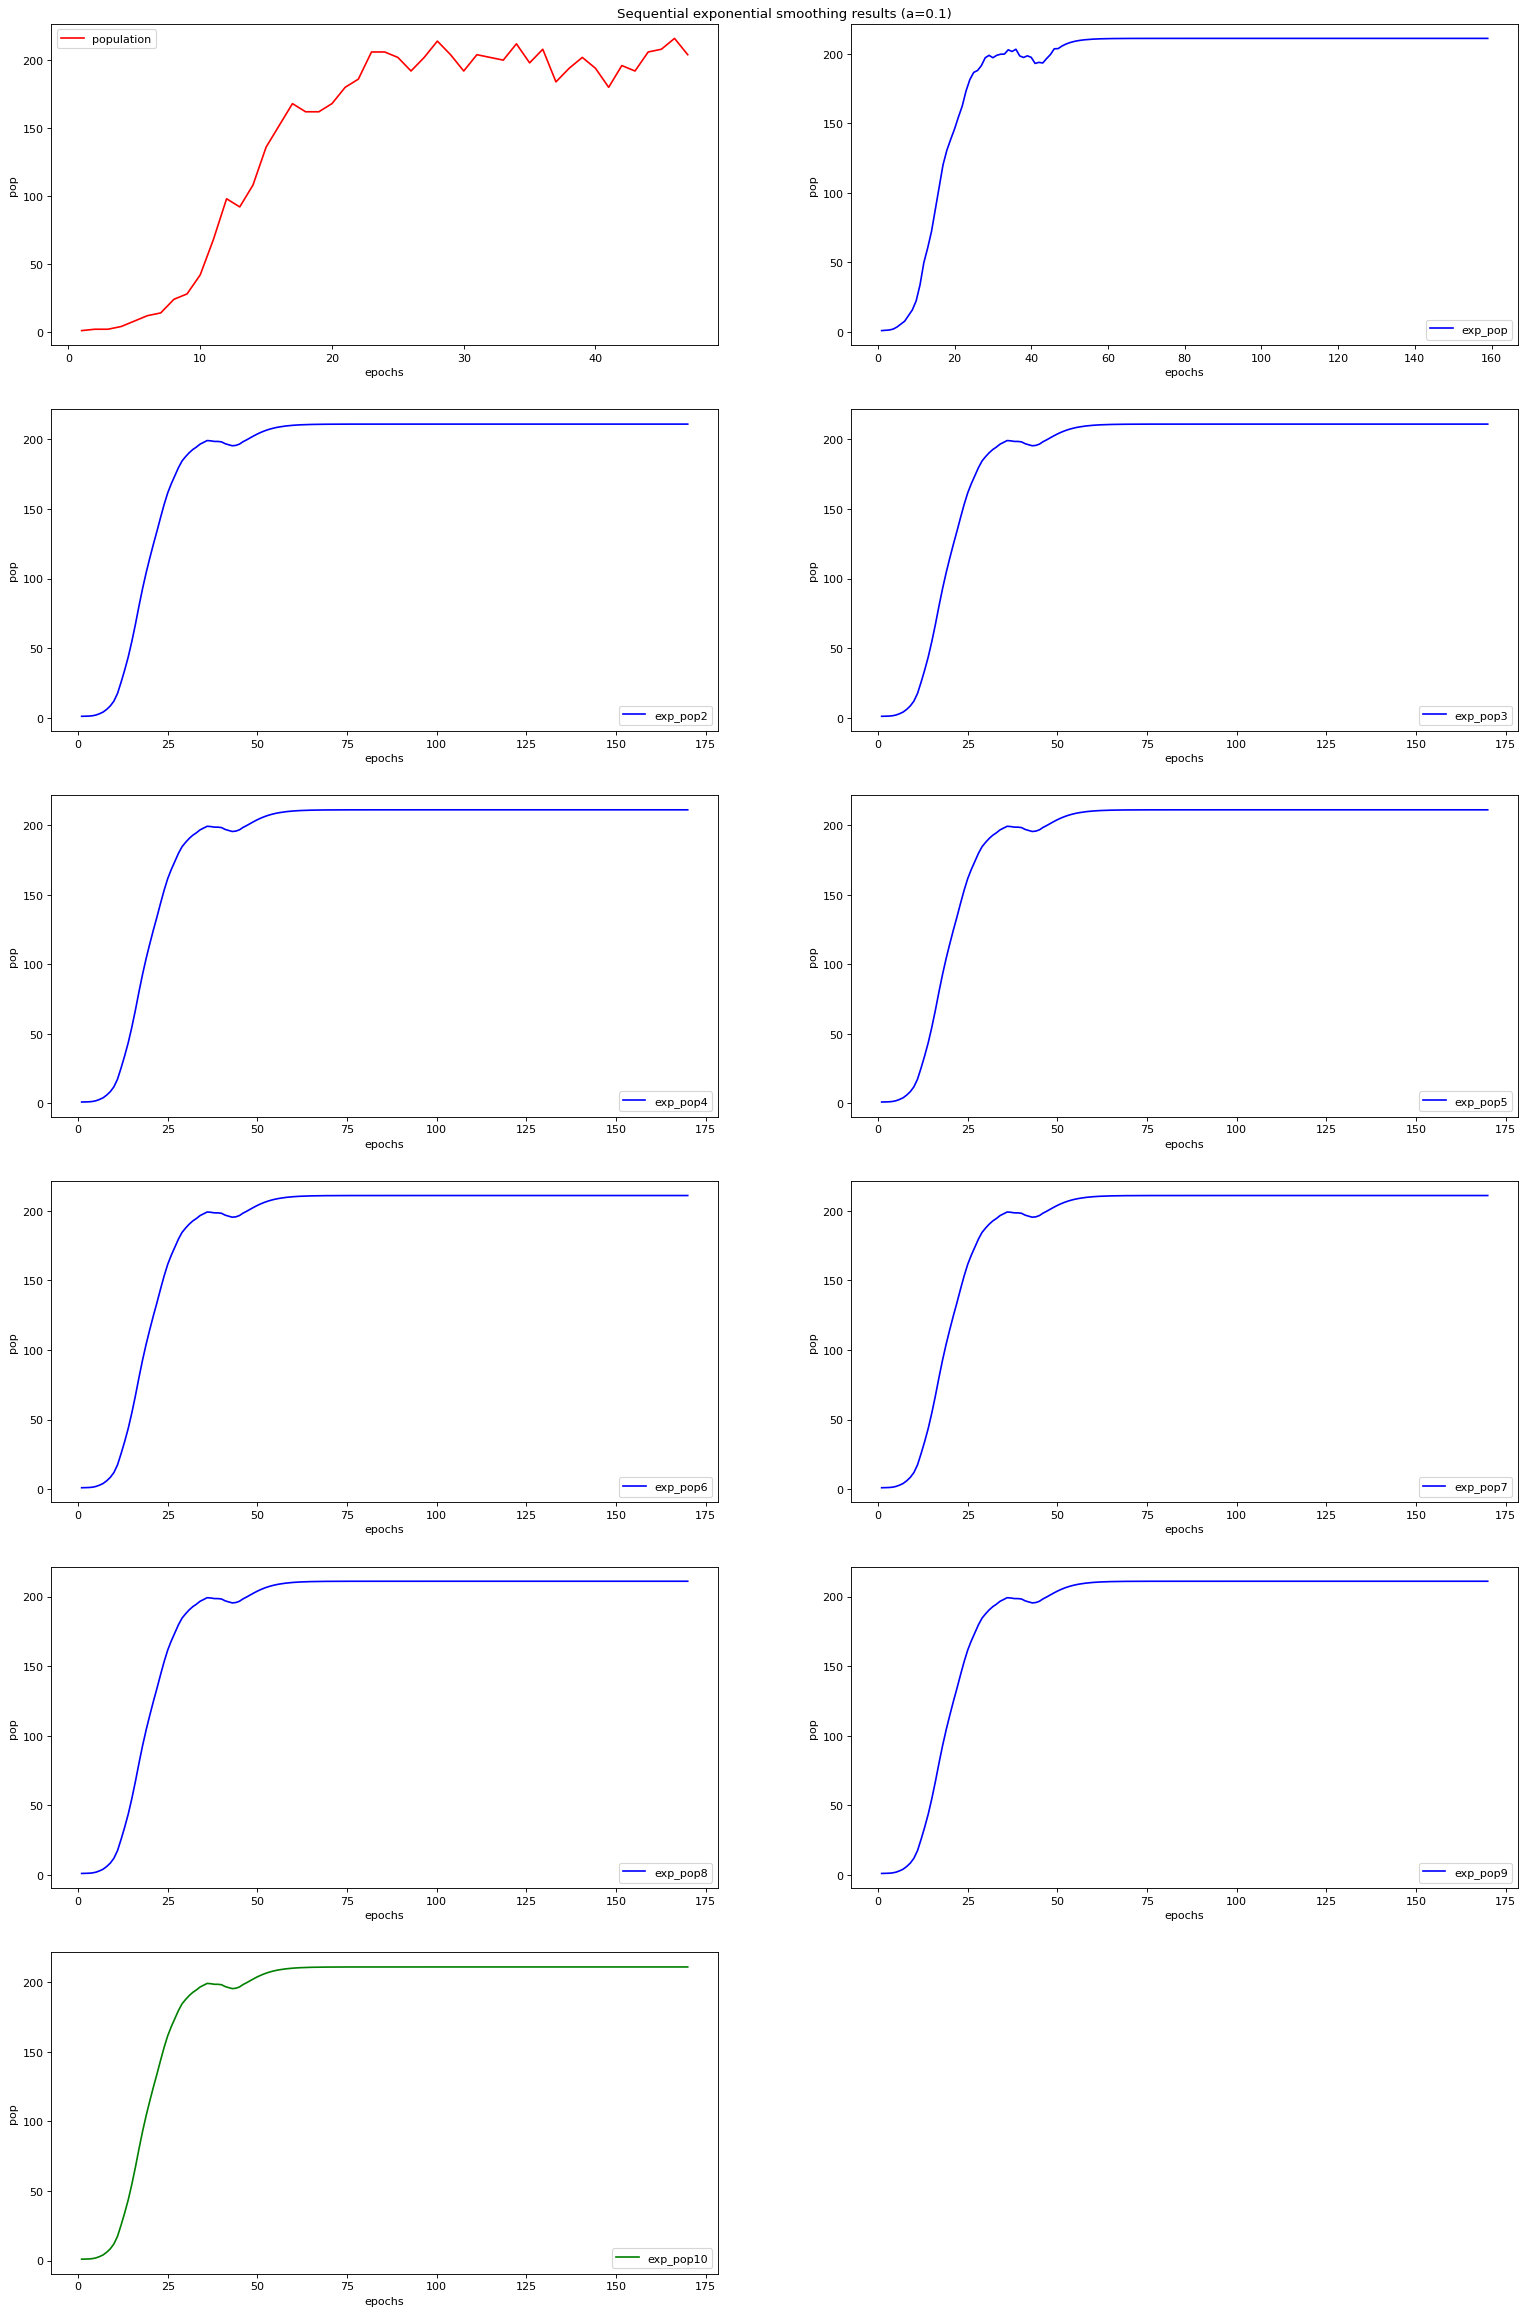

In [71]:
print_smoothing(data2, x='epochs')